<a href="https://colab.research.google.com/github/Squirrelcoding/data-science/blob/main/kaggle_thing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle competitions download -c playground-series-s5e10

playground-series-s5e10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip playground-series-s5e10.zip

Archive:  playground-series-s5e10.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [24]:
new_df = df

new_df['lighting'] = df['lighting'].map({
    "night": -1,
    "dim": 0,
    "daylight": 1
})

new_df['time_of_day'] = df['time_of_day'].map({
    "morning": 1,
    "afternoon": 0,
    "evening": -1
})

new_df['weather'] = df['weather'].map({
    "clear": 1,
    "foggy": 0,
    "rainy": -1
})

In [28]:
one_hot_encoding_road_type = pd.get_dummies(df['road_type'])

new_df = new_df.drop('road_type', axis=1)
new_df.join(one_hot_encoding_road_type)

,id,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk,highway,rural,urban
0,0,2,0.06,35,1,-1,False,True,0,False,True,1,0.13,False,False,True
1,1,4,0.99,35,1,1,True,False,-1,True,True,0,0.35,False,False,True
2,2,4,0.63,70,0,1,False,True,1,True,False,2,0.30,False,True,False
3,3,4,0.07,35,0,-1,True,True,1,False,False,1,0.21,True,False,False
4,4,1,0.58,60,1,0,False,False,-1,True,False,1,0.56,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,4,0.10,70,1,0,True,True,0,False,False,2,0.32,True,False,False
517750,517750,4,0.47,35,1,-1,True,True,1,False,False,1,0.26,False,True,False
517751,517751,4,0.62,25,1,0,False,False,0,False,True,0,0.19,False,False,True
517752,517752,3,0.63,25,-1,1,True,False,0,True,True,3,0.51,True,False,False


<Axes: >

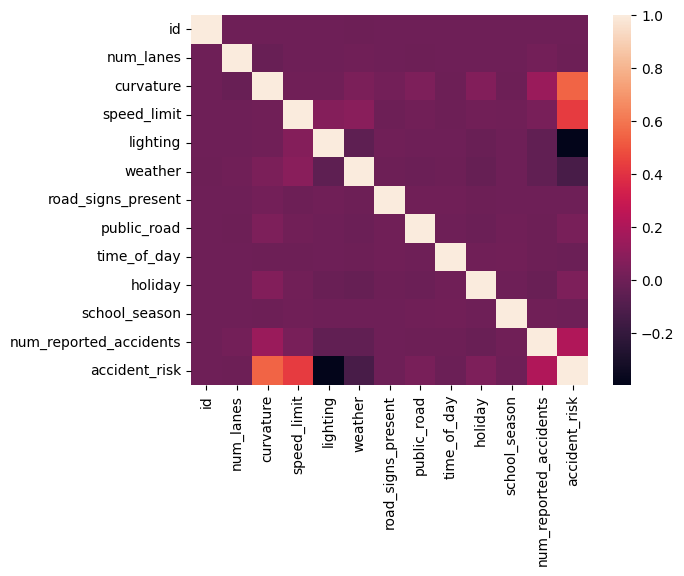

In [30]:
sns.heatmap(new_df.corr())

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

new_df = new_df.drop(['id'], axis=1)

bool_cols = ['road_signs_present', 'public_road', 'holiday', 'school_season']
new_df[bool_cols] = new_df[bool_cols].astype(int)

X = sm.add_constant(new_df.drop(['accident_risk'], axis=1))
y = new_df['accident_risk']

model = sm.OLS(y, X).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          accident_risk   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 1.192e+05
Date:                Mon, 20 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:52:34   Log-Likelihood:             5.2058e+05
No. Observations:              517754   AIC:                        -1.041e+06
Df Residuals:                  517742   BIC:                        -1.041e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0537      0.001    -92.627      0.000      -0.055      -0.053
num_lanes                  0.0006      0.000      5.613      0.000       0.000       0.001
curvature                  0.3286      0.000    716.219      0.000       0.328       0.329
speed_limit                0.0050   7.85e-06    635.097      0.000       0.005       0.005
lighting                  -0.0906      0.000   -587.231      0.000      -0.091      -0.090
weather                   -0.0449      0.000   -291.111      0.000      -0.045      -0.045
road_signs_present        -0.0014      0.000     -5.754      0.000      -0.002      -0.001
public_road               -0.0007      0.000     -2.735      0.006      -0.001      -0.000
time_of_day               -0.0016      0.000    -10.588      0.000      -0.002      -0.001
holiday                    0.0003      0.000      1.339      0.181      -0.000       0.001
school_season             -0.0001      0.000     -0.494      0.621      -0.001       0.000
num_reported_accidents     0.0174      0.000    125.155      0.000       0.017       0.018
==============================================================================
Omnibus:                      705.539   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              846.480
Skew:                          -0.011   Prob(JB):                    1.55e-184
Kurtosis:                       3.197   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[0, 2, 0.06, ..., True, 1, 0.13],
       [1, 4, 0.99, ..., True, 0, 0.35],
       [2, 4, 0.63, ..., False, 2, 0.3],
       ...,
       [517751, 4, 0.62, ..., True, 0, 0.19],
       [517752, 3, 0.63, ..., True, 3, 0.51],
       [517753, 2, 0.31, ..., True, 2, 0.22]], dtype=object)